In [1]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

In [2]:
with open("nasdaq100.html", encoding='utf8') as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [3]:
print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0061)https://siblisresearch.com/data/historical-components-nasdaq/ -->
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="./nasdaq100_files/autoptimize_d0898973e587517734e6d0d642ad0256.css" media="all" rel="stylesheet"/>
  <title>
   NASDAQ 100 Historical Components &amp; Changes | Siblis Research
  </title>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://siblisresearch.com/xmlrpc.php" rel="pingback"/>
  <style type="text/css">
   #site-footer-widgets #menu-footer-menu {
    list-style: outside none none;
    margin: 0;
    padding: 0;
}

#site-footer-widgets #menu-footer-menu li {
    font-weight: bold;
    margin-right: 27px;
    display: inline;
}        
        
#site-footer-widgets #menu-footer-menu li:last-child a {
    color:

In [4]:
soup.find_all("td", attrs = {"data-x":"0"})

[<td class="fsize-12 htCenter htMiddle" data-cell-id="A2" data-cell-type="text" data-order="AAL" data-original-value="AAL" data-x="0" data-y="2" style="font-size: 12px; line-height: 18px;">AAL</td>,
 <td class="fsize-12 htCenter htMiddle" data-cell-id="A3" data-cell-type="text" data-order="AAPL" data-original-value="AAPL" data-x="0" data-y="3" style="font-size: 12px; line-height: 18px;">AAPL</td>,
 <td class="fsize-12 htCenter htMiddle" data-cell-id="A4" data-cell-type="text" data-order="ADBE" data-original-value="ADBE" data-x="0" data-y="4" style="font-size: 12px; line-height: 18px;">ADBE</td>,
 <td class="fsize-12 htCenter htMiddle" data-cell-id="A5" data-cell-type="text" data-order="ADI" data-original-value="ADI" data-x="0" data-y="5" style="font-size: 12px; line-height: 18px;">ADI</td>,
 <td class="fsize-12 htCenter htMiddle" data-cell-id="A6" data-cell-type="text" data-order="ADP" data-original-value="ADP" data-x="0" data-y="6" style="font-size: 12px; line-height: 18px;">ADP</td>,

In [5]:
company_listings = []
for idx in range(len(soup.find_all("td", attrs = {"data-x":"8"}))):
    if soup.find_all("td", attrs = {"data-x":"8"})[idx]['data-order'] == "X":
        company_listings.append(soup.find_all("td", attrs = {"data-x":"0"})[idx]['data-order'])
print(company_listings)

['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BMRN', 'CA', 'CELG', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'TCOM', 'CTSH', 'CTXS', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX (Old)', 'FOXA (Old)', 'GILD', 'GOOG', 'GOOGL', 'HAS', 'HOLX', 'HSIC', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LILA', 'LILAK', 'LRCX', 'LVNTA', 'MAR', 'MAT', 'MCHP', 'MDLZ', 'MNST', 'MSFT', 'MU', 'MXIM', 'VTRS', 'NCLH', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'ORLY', 'PAYX', 'PCAR', 'BKNG', 'PYPL', 'QCOM', 'QRTEA', 'REGN', 'ROST', 'SBAC', 'SBUX', 'SHPG', 'SIRI', 'STX', 'SWKS', 'NLOK', 'TMUS', 'TRIP', 'TSCO', 'TSLA', 'TXN', 'ULTA', 'VIAB', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDC', 'XLNX', 'XRAY', 'YHOO']


In [12]:
#get a company's ticker using a key
quandl.ApiConfig.api_key = ''

#Get list of tickers
ticker = pd.read_csv('ticker_list.csv')

In [7]:
#I suspect NASDAQ stocks wil be, on average, more sensitive to Twitter sentiment than "traditional" companies on NYSE, SP500, etc
nasdaq = ticker[ticker["Exchange"] == "NASDAQ"].reset_index(drop = True)
nasdaq100 = nasdaq[nasdaq['Ticker'].isin(company_listings)].reset_index(drop = True)

In [8]:
# list of all NASDAQ 100 stocks (EOY 2016) in Quandl's NASDAQ database
# list(nasdaq100['Ticker'])

# list of companies in NASDAQ 100 (EOY 2016) not in Quandl's NASDAQ database
# set(list(nasdaq100['Ticker'])) ^ set(company_listings)


In [9]:
#graphs of all NASDAQ 100 companies
#for code in nasdaq100["Quandl_Code"]:
#    company = quandl.get(code, start_date='2016-12-31', end_date='2020-12-31')
#    plt.plot(company["Open"])
#    plt.title(nasdaq100[nasdaq100["Quandl_Code"] == code].reset_index(drop = True)["Name"][0])
#    plt.show()

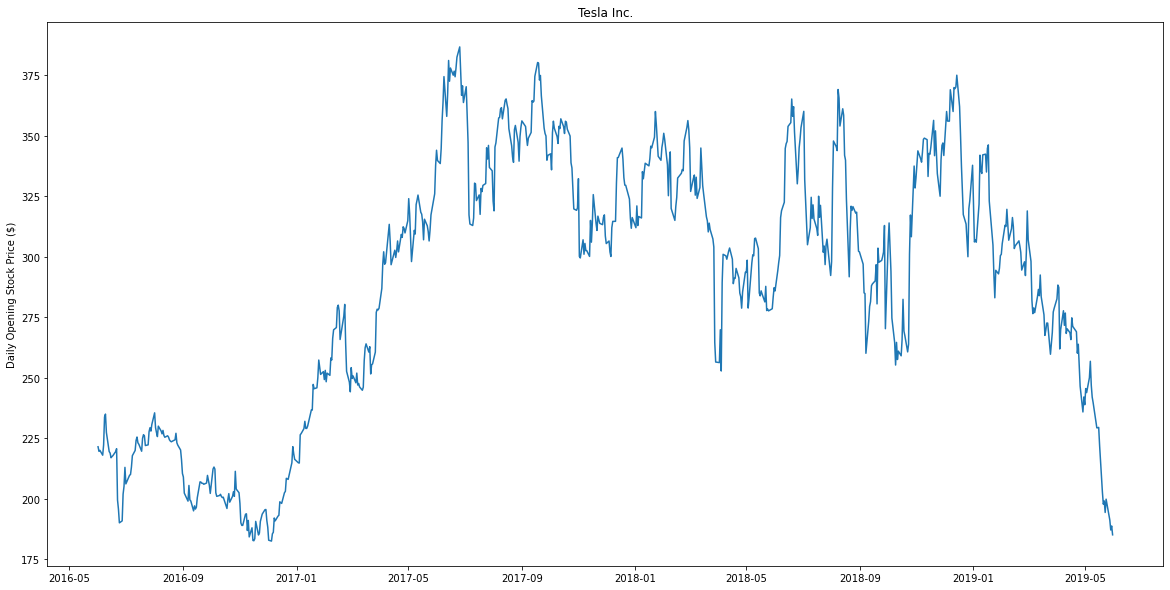

In [11]:
#Tesla stock price (June 2017 - June 2019)
tesla = quandl.get("EOD/TSLA", start_date='2016-6-1', end_date='2019-6-1')

plt.plot(tesla['Open'])
plt.title(nasdaq100[nasdaq100["Quandl_Code"] == "EOD/TSLA"].reset_index(drop = True)["Name"][0])
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel("Daily Opening Stock Price ($)")
plt.show()